In [187]:
import pandas as pd
%pylab inline
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
%matplotlib inline
from sklearn.metrics import roc_curve
import numpy as np

Populating the interactive namespace from numpy and matplotlib


In [188]:
df=pd.read_csv("D:\Poojitha\Data_Science_Essentials\BNP\\train.csv")

In [189]:
df.columns

Index([u'ID', u'target', u'v1', u'v2', u'v3', u'v4', u'v5', u'v6', u'v7',
       u'v8',
       ...
       u'v122', u'v123', u'v124', u'v125', u'v126', u'v127', u'v128', u'v129',
       u'v130', u'v131'],
      dtype='object', length=133)

In [190]:
#df[df.v24.isnull()]

In [191]:
#df.v125.value_counts()

In [192]:
#df.v112

In [193]:
#df[df.v112.isnull()]

In [194]:
#categorical_variables = ['v112']
#for variable in categorical_variables:
     #Fill missing data with the word "Missing"
    #df[variable].fillna("Missing", inplace=True)
     #Create array of dummies
    #dummies = pd.get_dummies(df[variable], prefix=variable)
     #Update X to include dummies and drop the main variable
    #df = pd.concat([df, dummies], axis=1)
    #df.drop([variable], axis=1, inplace=True)

In [195]:
#df.describe()

In [196]:
#df1=df.drop(['v22', 'v56', 'v112', 'v113', 'v125'], axis=1)

In [197]:
#y=df1['target']
#df1=df1.drop(['target'], axis=1)


In [198]:
numeric_variables = list(df.dtypes[df.dtypes != "object"].index)
df[numeric_variables].shape

(114321, 114)

In [199]:
categorical_variables = list(df.dtypes[df.dtypes == 'object'].index)
df[categorical_variables].shape

(114321, 19)

In [200]:
names = df["v22"].unique().tolist() 
replacement_dict = dict(zip(names, range(1, len(names)+1, 1))) 
df["v22"] = df["v22"].replace(to_replace=replacement_dict) 

In [201]:
variables=['v56', 'v112', 'v113', 'v125']
for variable in variables:
    names = df[variable].unique().tolist() 
    replacement_dict = dict(zip(names, range(1, len(names)+1, 1))) 
    df[variable] = df[variable].replace(to_replace=replacement_dict)

In [202]:
categorical_variables = list(df.dtypes[df.dtypes == 'object'].index)
df[categorical_variables].shape

(114321, 14)

In [203]:
#df[categorical_variables].head()

In [204]:
#df1[df1.v79.isnull()]

In [205]:
categorical_variables = ['v3', 'v24', 'v30', 'v31', 'v47', 'v52', 'v66', 'v71', 'v74', 
                         'v75', 'v79', 'v91', 'v107', 'v110']
for variable in categorical_variables:
     #Fill missing data with the word "Missing"
    df[variable].fillna("Missing", inplace=True)
     #Create array of dummies
    dummies = pd.get_dummies(df[variable], prefix=variable)
     #Update X to include dummies and drop the main variable
    df = pd.concat([df, dummies], axis=1)
    df.drop([variable], axis=1, inplace=True)

In [206]:
df1=df.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)

In [207]:
y=df1['target']
df1=df1.drop(['target'], axis=1)

In [208]:
del df1['ID']

In [209]:
numeric_variables = list(df1.dtypes[df1.dtypes != "object"].index)
df1[numeric_variables].shape

(62561, 217)

In [210]:
#df1.describe()

In [69]:
model = RandomForestRegressor(5000, oob_score=True, n_jobs=-1, random_state=42)
model.fit(df1, y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=5000, n_jobs=-1, oob_score=True, random_state=42,
           verbose=0, warm_start=False)

In [58]:
#df1.describe()

In [70]:
roc = roc_auc_score(y, model.oob_prediction_)
print "C-stat: ", roc_auc_score(y, model.oob_prediction_)

C-stat:  0.74286751938


C:\Users\Poojitha\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: sort is deprecated, use sort_values(inplace=True) for INPLACE sorting
  from ipykernel import kernelapp as app


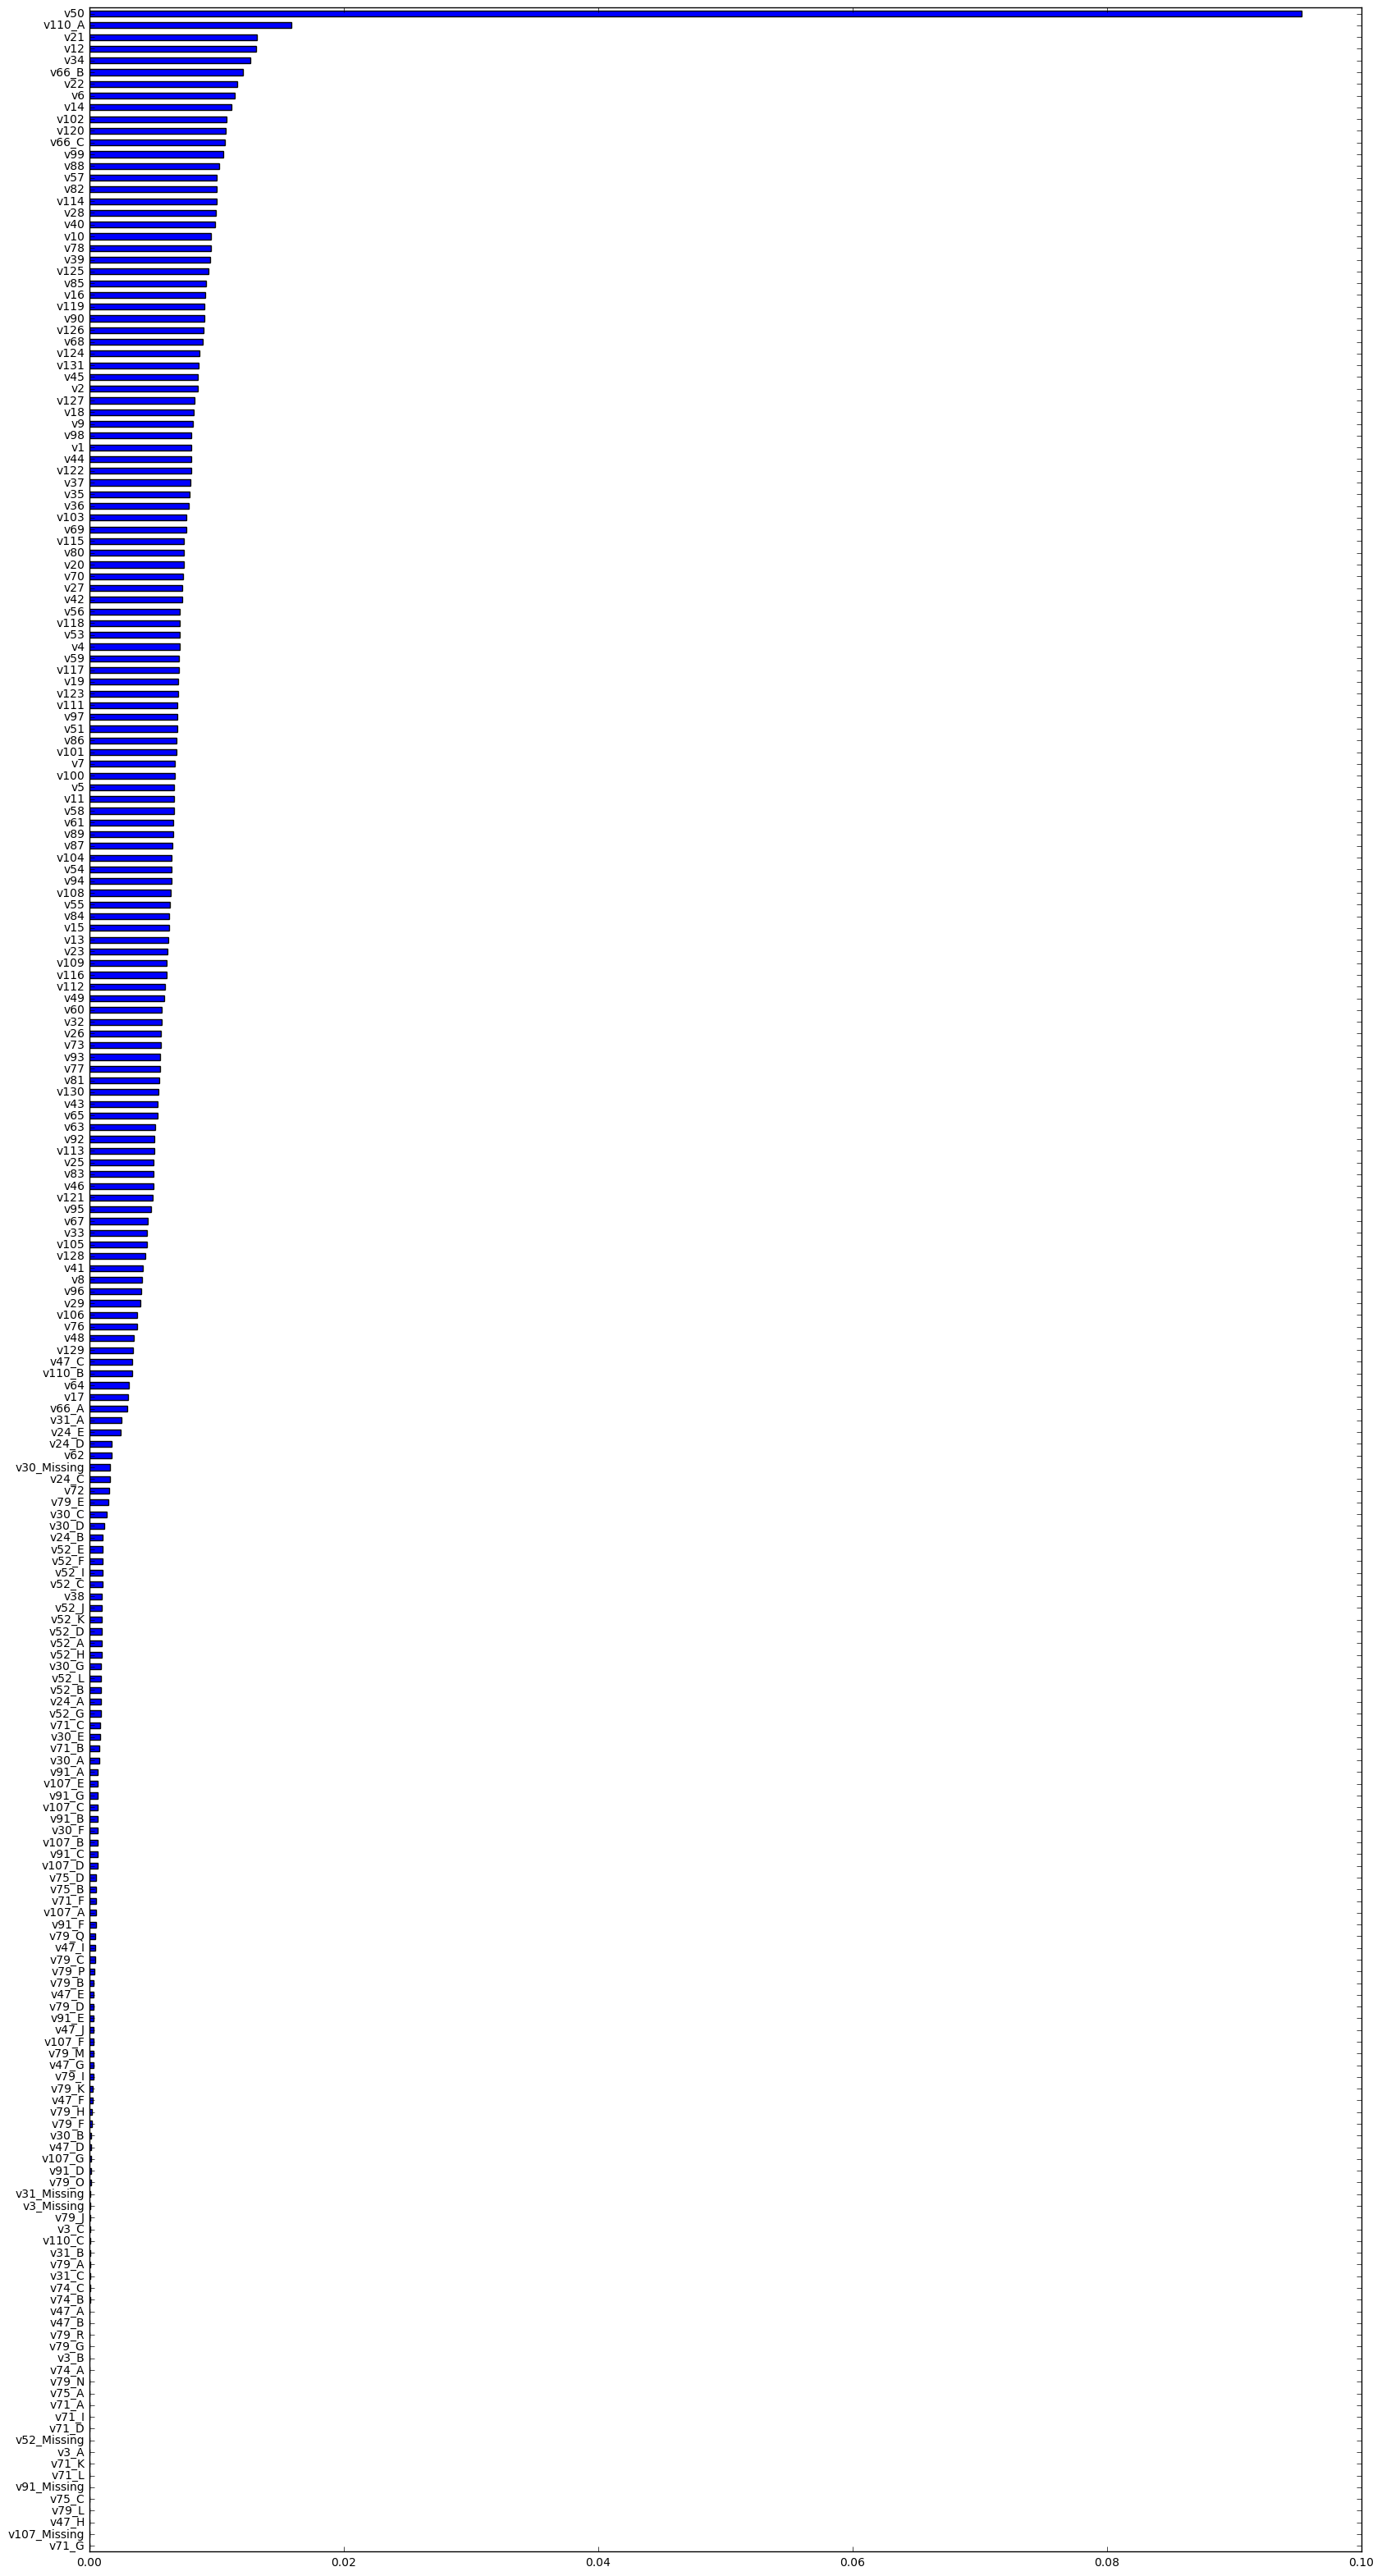

In [71]:
feature_importances = pd.Series(model.feature_importances_, index=df1.columns)
feature_importances.sort()
feature_importances.plot(kind="barh", figsize=(20,40));

In [211]:
del df1['v107_B']
del df1['v107_C']
del df1['v107_E']
del df1['v91_G']
del df1['v91_A']
#del df1['v30_A']
#del df1['v71_B']
#del df1['v30_E']
#del df1['v71_C']
#del df1['v52_B']
#del df1['v24_A']
#del df1['v52_G']
#del df1['v52_L']
#del df1['v30_G']
#del df1['v52_H']
#del df1['v52_D']
#del df1['v52_A']
#del df1['v52_K']
#del df1['v52_J']
#del df1['v47_H']
#del df1['v38']
#del df1['v52_I']
#del df1['v52_C']
#del df1['v52_F']
#del df1['v24_B']
#del df1['v47_H']
#del df1['v52_E']
#del df1['v24_B']
#del df1['v52_E']
#del df1['v30_D']
#del df1['v30_C']
#del df1['v47_H']
#del df1['v79_E']
#del df1['v72']
#del df1['v30_Missing']
#del df1['v24_C']
#del df1['v62']
#del df1['v24_D']

In [212]:
del df1['v79_O']
del df1['v107_G']
del df1['v91_D']
del df1['v47_D']
del df1['v30_B']
del df1['v79_F']
del df1['v47_F']
del df1['v79_K']
del df1['v79_I']
del df1['v91_E']
del df1['v47_G']
del df1['v79_M']
del df1['v107_F']
del df1['v79_H']
del df1['v79_B']
del df1['v79_D']
del df1['v47_E']
del df1['v47_J']
del df1['v79_P']
del df1['v79_C']
del df1['v47_I']
del df1['v79_Q']
del df1['v107_A']
del df1['v91_F']
del df1['v75_B']
del df1['v71_F']
del df1['v75_D']
del df1['v107_D']
del df1['v91_B']
del df1['v91_C']
del df1['v30_F']

In [213]:
#del df1['v71_G']
del df1['v91_Missing']
del df1['v107_Missing']
del df1['v3_A']
del df1['v74_A']
del df1['v79_N']
del df1['v3_B']
del df1['v79_G']
del df1['v47_A']
del df1['v47_B']
#del df1['v47_H']
del df1['v79_R']
del df1['v74_B']
del df1['v74_C']
del df1['v110_C']
del df1['v79_A']
del df1['v31_C']
del df1['v31_Missing']
del df1['v3_Missing']
del df1['v3_C']
del df1['v31_B']
del df1['v79_J']

In [214]:
del df1['v47_H']
del df1['v71_A']
del df1['v75_C']
del df1['v79_L']
del df1['v71_D']
del df1['v71_I']
del df1['v71_L']
del df1['v71_K']
del df1['v75_A']
del df1['v52_Missing']
del df1['v71_G']

In [29]:
model = RandomForestRegressor(5000, oob_score=True, n_jobs=-1, random_state=42)
model.fit(df1, y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=5000, n_jobs=-1, oob_score=True, random_state=42,
           verbose=0, warm_start=False)

In [30]:
roc = roc_auc_score(y, model.oob_prediction_)
print "C-stat: ", roc_auc_score(y, model.oob_prediction_)

C-stat:  0.742087998529


200 trees
C-stat:  0.72899457395

500 trees
C-stat:  0.735681900022

1000 trees
C-stat:  0.737722651455

2000 trees
C-stat:  0.738438015286



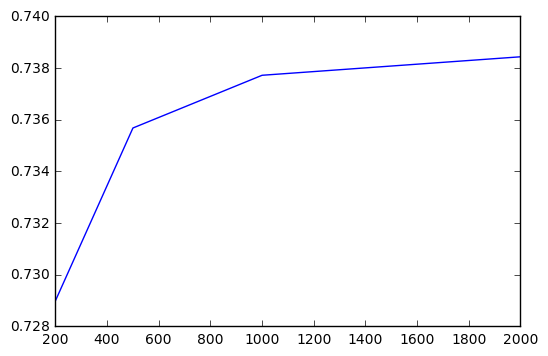

In [104]:
results = []
n_estimator_options = [200, 500, 1000, 2000]

for trees in n_estimator_options:
    model1 = RandomForestRegressor(trees, oob_score=True, n_jobs=-1, random_state=42)
    model1.fit(df1, y)
    print trees, "trees"
    roc = roc_auc_score(y, model1.oob_prediction_)
    print "C-stat: ", roc
    results.append(roc)
    print ""
    
pd.Series(results, n_estimator_options).plot(); 

auto option
C-stat:  0.740889707908

None option
C-stat:  0.740889707908

sqrt option
C-stat:  0.75361285087

log2 option
C-stat:  0.748412368071

0.9 option
C-stat:  0.741471362549

0.2 option
C-stat:  0.751806219837



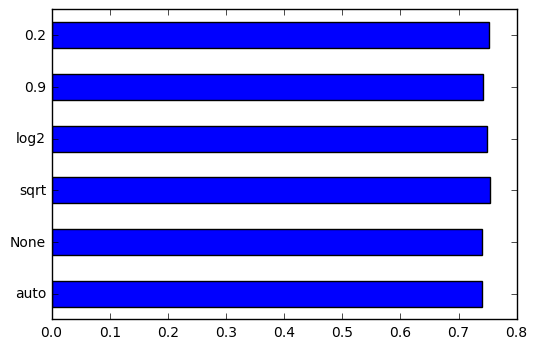

In [31]:
results = []
max_features_options = ["auto", None, "sqrt", "log2", 0.9, 0.2]

for max_features in max_features_options:
    model = RandomForestRegressor(n_estimators=1000, oob_score=True, n_jobs=-1, random_state=42, max_features=max_features)
    model.fit(df1, y)
    print max_features, "option"
    roc = roc_auc_score(y, model.oob_prediction_)
    print "C-stat: ", roc
    results.append(roc)
    print ""
    
pd.Series(results, max_features_options).plot(kind="barh");

1 min samples
C-stat:  0.740889707908

2 min samples
C-stat:  0.743988013923

6 min samples
C-stat:  0.746278383808

8 min samples
C-stat:  0.746234020021

10 min samples
C-stat:  0.745818957221



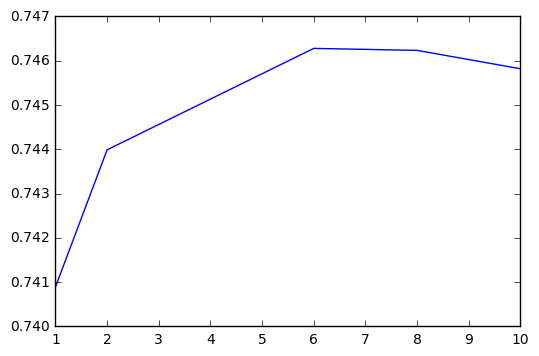

In [30]:

#min_features for best split
results = []
min_samples_leaf_options = [1,2,6,8,10]

for min_samples in min_samples_leaf_options:
    model = RandomForestRegressor(n_estimators=1000, 
                                  oob_score=True, 
                                  n_jobs=-1, 
                                  random_state=42, 
                                  max_features="auto", 
                                  min_samples_leaf=min_samples)
    model.fit(df1, y) m
    
    print min_samples, "min samples"
    roc = roc_auc_score(y, model.oob_prediction_)
    print "C-stat: ", roc
    results.append(roc)
    print ""
    
pd.Series(results, min_samples_leaf_options).plot();

In [215]:
model = RandomForestRegressor(n_estimators=1000, 
                                  oob_score=True, 
                                  n_jobs=-1, 
                                  random_state=42, 
                                  max_features="sqrt", 
                                  min_samples_leaf=6)
model.fit(df1, y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='sqrt', max_leaf_nodes=None, min_samples_leaf=6,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=1000, n_jobs=-1, oob_score=True, random_state=42,
           verbose=0, warm_start=False)

In [216]:
roc = roc_auc_score(y, model.oob_prediction_)
print "C-stat: ", roc_auc_score(y, model.oob_prediction_)

C-stat:  0.752129298549


In [217]:
df_test=pd.read_csv("D:\Poojitha\Data_Science_Essentials\BNP\\test.csv")
df_test

,ID,v1,v2,v3,v4,v5,v6,v7,v8,v9,...,v122,v123,v124,v125,v126,v127,v128,v129,v130,v131
0,0,1.375465e+00,11.361141,C,4.200778,6.577000,2.081784,1.784386,0.011094,9.523810,...,7.619048,1.815241,1.112270e-07,AF,1.292368,3.903345,1.485925,0,2.333334,1.428572e+00
1,1,NaN,NaN,C,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,I,NaN,NaN,NaN,0,NaN,NaN
2,2,-4.903407e-07,8.201529,C,4.544371,6.550100,1.558442,2.467532,0.007164,7.142858,...,5.714286,1.970928,1.412265e-02,AV,1.128724,5.844156,1.475892,0,1.263157,-6.380022e-07
3,7,2.661870e+00,3.041241,C,1.657216,9.773080,2.078337,1.430855,1.252157,7.959596,...,4.404040,8.163614,1.100329e+00,B,1.988688,1.558753,2.448814,0,5.385474,1.493777e+00
4,10,1.252822e+00,11.283352,C,4.638388,8.520510,2.302484,3.510159,0.074263,7.612904,...,6.580644,1.325654,2.584588e-01,A,1.863796,2.666478,2.374275,0,0.681672,2.264151e+00
5,11,1.733601e+00,7.525109,C,3.263905,5.608608,2.356090,2.369477,0.065481,9.935483,...,5.032257,2.551374,-9.391195e-07,BM,1.541607,3.463855,1.196959,0,2.598869,1.217392e+00
6,13,NaN,NaN,C,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,CK,NaN,NaN,NaN,0,NaN,NaN
7,14,2.027902e+00,6.947583,C,5.840414,7.944518,3.607374,2.541107,1.870223,9.818181,...,8.218182,2.011008,6.788057e-01,BJ,1.591433,2.541105,1.386445,0,1.129412,3.055555e+00
8,15,1.296225e+00,9.573390,C,3.387392,9.316076,2.133125,1.650447,0.236811,12.050474,...,10.977917,2.984337,4.996407e-03,BH,1.327866,3.999610,1.854306,1,1.830189,1.855670e+00
9,16,NaN,NaN,C,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,AN,NaN,NaN,NaN,0,NaN,NaN


In [218]:
#df_test=df_test.drop(['v22', 'v3', 'v30', 'v31', 'v52', 'v56', 'v91', 'v107', 'v112', 'v113', 'v125'], axis=1)

In [219]:
del df_test['ID']

In [220]:
categorical_variables = list(df_test.dtypes[df_test.dtypes == 'object'].index)
df_test[categorical_variables].shape

(114393, 19)

In [221]:
#categorical_variables

In [222]:
numeric_variables = list(df_test.dtypes[df_test.dtypes != "object"].index)
df_test[numeric_variables].shape

(114393, 112)

In [223]:
#del df_test['ID']

In [224]:
#a= numeric_variables
#a

In [225]:
for i in a:
    df_test[i]=df_test[i].fillna(df_test[i].mean())

In [226]:
variables=['v22', 'v56', 'v112', 'v113', 'v125']
for variable in variables:
    names = df_test[variable].unique().tolist() 
    replacement_dict = dict(zip(names, range(1, len(names)+1, 1))) 
    df_test[variable] = df_test[variable].replace(to_replace=replacement_dict)

In [227]:
categorical_variables = ['v3', 'v24', 'v30', 'v31', 'v47', 'v52', 'v66', 'v71', 'v74', 
                         'v75', 'v79', 'v91', 'v107', 'v110']
for variable in categorical_variables:
     #Fill missing data with the word "Missing"
    df_test[variable].fillna("Missing", inplace=True)
     #Create array of dummies
    dummies = pd.get_dummies(df_test[variable], prefix=variable)
     #Update X to include dummies and drop the main variable
    df_test = pd.concat([df_test, dummies], axis=1)
    df_test.drop([variable], axis=1, inplace=True)

In [228]:
#df_test.describe()

In [229]:
#df_test['']

In [230]:
#df_test.columns

In [231]:
del df_test['v107_B']
del df_test['v107_C']
del df_test['v107_E']
del df_test['v91_G']
del df_test['v91_A']
del df_test['v79_O']
del df_test['v107_G']
del df_test['v91_D']
del df_test['v47_D']
del df_test['v30_B']
del df_test['v79_F']
del df_test['v47_F']
del df_test['v79_K']
del df_test['v79_I']
del df_test['v91_E']
del df_test['v47_G']
del df_test['v79_M']
del df_test['v107_F']
del df_test['v79_H']
del df_test['v79_B']
del df_test['v79_D']
del df_test['v47_E']
del df_test['v47_J']
del df_test['v79_P']
del df_test['v79_C']
del df_test['v47_I']
del df_test['v79_Q']
del df_test['v107_A']
del df_test['v91_F']
del df_test['v75_B']
del df_test['v71_F']
del df_test['v75_D']
del df_test['v107_D']
del df_test['v91_B']
del df_test['v91_C']
del df_test['v30_F']
#del df_test['v71_G']
del df_test['v91_Missing']
del df_test['v107_Missing']
del df_test['v3_A']
del df_test['v74_A']
del df_test['v79_N']
del df_test['v3_B']
del df_test['v79_G']
del df_test['v47_A']
del df_test['v47_B']
#del df_test['v47_H']
del df_test['v79_R']
del df_test['v74_B']
del df_test['v74_C']
del df_test['v110_C']
del df_test['v79_A']
del df_test['v31_C']
del df_test['v31_Missing']
del df_test['v3_Missing']
del df_test['v3_C']
del df_test['v31_B']
del df_test['v79_J']
#del df_test['v47_H']
#del df_test['v71_A']
#del df_test['v79_L']
#del df_test['v71_K']

In [232]:
#del df_test['v71_D']
del df_test['v71_I']
del df_test['v71_L']
del df_test['v75_C']
del df_test['v75_A']
del df_test['v52_Missing']
del df_test['v71_G']

In [233]:
del df_test['v71_E']
del df_test['v71_H']
del df_test['v71_J']

In [235]:
df_test.describe()

,v1,v2,v4,v5,v6,v7,v8,v9,v10,v11,...,v52_K,v52_L,v66_A,v66_B,v66_C,v71_B,v71_C,v79_E,v110_A,v110_B
count,1.143930e+05,1.143930e+05,1.143930e+05,114393.000000,1.143930e+05,1.143930e+05,1.143930e+05,1.143930e+05,1.143930e+05,1.143930e+05,...,114393.000000,114393.000000,114393.000000,114393.000000,114393.000000,114393.000000,114393.000000,114393.000000,114393.000000,114393.000000
mean,1.628623e+00,7.436088e+00,4.141265e+00,8.739797,2.435884e+00,2.482134e+00,1.512246e+00,9.031840e+00,1.882422e+00,1.544679e+01,...,0.078326,0.084009,0.615204,0.159835,0.224961,0.261703,0.079865,0.220311,0.487154,0.484540
std,8.056977e-01,2.210640e+00,8.632439e-01,1.555173,4.407740e-01,4.449518e-01,2.125973e+00,1.444447e+00,1.397297e+00,5.901477e-01,...,0.268686,0.277402,0.486549,0.366455,0.417559,0.439564,0.271085,0.414458,0.499837,0.499763
min,-9.974864e-07,-3.341912e-07,-1.225209e-08,0.423671,-9.873300e-07,-8.716865e-07,-2.001387e-07,-9.049570e-07,-9.669047e-07,-8.559817e-08,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.344566e+00,6.540866e+00,4.070436e+00,8.381345,2.338830e+00,2.373822e+00,2.615409e-01,8.816505e+00,1.050328e+00,1.539558e+01,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.628623e+00,7.436088e+00,4.141265e+00,8.739797,2.435884e+00,2.482134e+00,1.512246e+00,9.031840e+00,1.312910e+00,1.544679e+01,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.628623e+00,7.520582e+00,4.336914e+00,8.922579,2.481814e+00,2.525662e+00,1.512246e+00,9.326145e+00,2.100657e+00,1.559375e+01,...,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,1.480000e+01,1.965869e+01,2.000000e+01,19.993275,7.292818e+00,2.000000e+01,2.000000e+01,2.000000e+01,2.000000e+01,2.000000e+01,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [236]:
df1.describe()

,v1,v2,v4,v5,v6,v7,v8,v9,v10,v11,...,v52_K,v52_L,v66_A,v66_B,v66_C,v71_B,v71_C,v79_E,v110_A,v110_B
count,6.256100e+04,62561.000000,62561.000000,62561.000000,6.256100e+04,62561.000000,62561.000000,6.256100e+04,6.256100e+04,62561.000000,...,62561.000000,62561.000000,62561.000000,62561.000000,62561.000000,62561.000000,62561.000000,62561.000000,62561.000000,62561.000000
mean,1.622739e+00,7.509075,4.169149,8.752807,2.442624e+00,2.489043,1.488391,9.034116e+00,1.922143e+00,15.455137,...,0.079634,0.085261,0.673503,0.168571,0.157926,0.256310,0.083391,0.261681,0.436822,0.521875
std,1.068133e+00,2.934379,1.118965,2.057759,5.806830e-01,0.579324,2.796117,1.918629e+00,1.431685e+00,0.769329,...,0.270728,0.279272,0.468935,0.374376,0.364674,0.436598,0.276474,0.439553,0.495996,0.499525
min,-9.996497e-07,0.144402,0.127883,1.015466,-7.892985e-07,0.127845,0.001926,-9.828757e-07,-9.547834e-07,6.122448,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9.135795e-01,5.363905,3.515942,7.592469,2.072155e+00,2.108380,0.081274,7.857142e+00,1.050328e+00,15.009939,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.465123e+00,7.051623,4.216339,8.670867,2.418605e+00,2.456282,0.364461,9.062499e+00,1.312910e+00,15.501729,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,2.126907e+00,9.480589,4.838213,9.784120,2.778078e+00,2.838628,1.605293,1.023569e+01,2.319474e+00,15.954593,...,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000
max,2.000000e+01,20.000000,11.831779,20.000000,8.679004e+00,5.886689,20.000001,2.000000e+01,1.853392e+01,19.285714,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [238]:
#numeric_variables = list(df_test.dtypes[df_test.dtypes != "object"].index)
#df_test[numeric_variables].shape

In [239]:
#numeric_variables

In [240]:
#numeric_variables = list(df1.dtypes[df1.dtypes != "object"].index)
#df1[numeric_variables].shape

In [241]:
#numeric_variables

In [242]:
answer= model.predict(df_test)

In [243]:
prediction=pd.DataFrame()
prediction['PredictedProb']=answer
prediction.to_csv("prediction_BNP.csv")